# Task 1: Feed-forward neural networks


---

Tutorial: "Machine Learning in Solid Mechanics @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dominik K. Klein, Jasper O. Schommartz

Winter term 2024 / 2025


---





*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook. You might need to restart your Colab session first ("Runtime / Restart session" in the header menu).*

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
now = datetime.datetime.now

import importlib

# %% Own modules
import data as ld
importlib.reload(ld)
import models as lm
importlib.reload(lm)

<module 'models' from 'f:\\CPShub\\TutorialMLinSolidMechanics\\Winter_term_24_25\\FFNN_introduction_2.3\\models.py'>

*If you want to clone the repository again, you have to delete it from your Google Colab files first. For this, you can run the following cell.*

### Load data and model

In [2]:
model = lm.main()

xs, ys, xs_c, ys_c, x_grid, y_grid, grad_tensor,grad_values = ld.bathtub()

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 private_x_to_y (_x_to_y)    ((None, 1),               337       
                              (None, 2))                         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


### Model calibration

2024-11-04 18:30:53.552425
Epoch 1/2000
10/10 - 0s - loss: 0.1037 - private_x_to_y_loss: 1296.9413 - private_x_to_y_1_loss: 0.1037 - 48ms/epoch - 5ms/step
Epoch 2/2000
10/10 - 0s - loss: 0.1028 - private_x_to_y_loss: 1297.6576 - private_x_to_y_1_loss: 0.1028 - 44ms/epoch - 4ms/step
Epoch 3/2000
10/10 - 0s - loss: 0.1017 - private_x_to_y_loss: 1305.1566 - private_x_to_y_1_loss: 0.1017 - 45ms/epoch - 5ms/step
Epoch 4/2000
10/10 - 0s - loss: 0.1012 - private_x_to_y_loss: 1311.7073 - private_x_to_y_1_loss: 0.1012 - 46ms/epoch - 5ms/step
Epoch 5/2000
10/10 - 0s - loss: 0.1005 - private_x_to_y_loss: 1325.8783 - private_x_to_y_1_loss: 0.1005 - 43ms/epoch - 4ms/step
Epoch 6/2000
10/10 - 0s - loss: 0.1007 - private_x_to_y_loss: 1326.0837 - private_x_to_y_1_loss: 0.1007 - 39ms/epoch - 4ms/step
Epoch 7/2000
10/10 - 0s - loss: 0.1017 - private_x_to_y_loss: 1336.0736 - private_x_to_y_1_loss: 0.1017 - 42ms/epoch - 4ms/step
Epoch 8/2000
10/10 - 0s - loss: 0.0993 - private_x_to_y_loss: 1351.4194 - pri

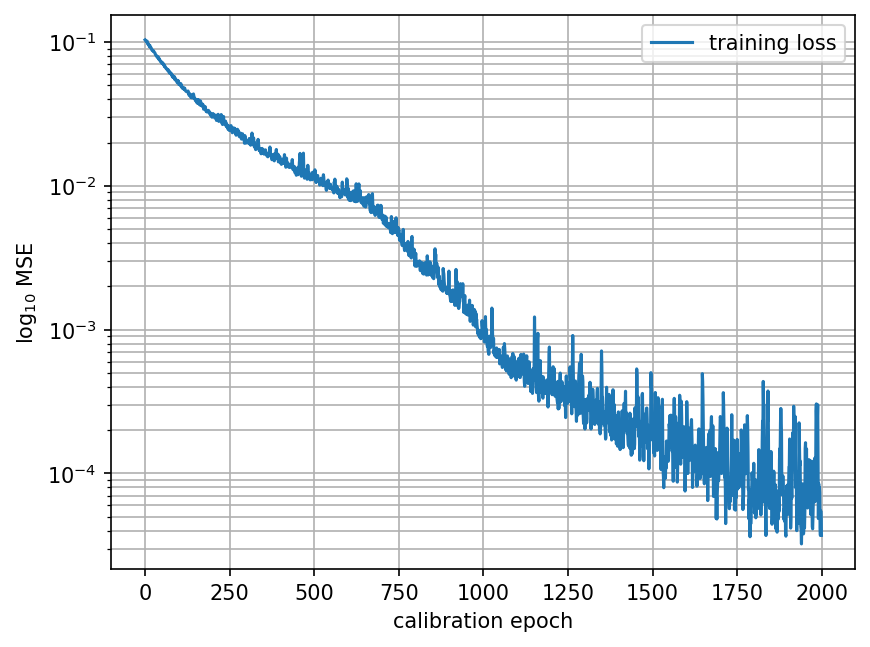

In [4]:
t1 = now()
print(t1)

model.optimizer.learning_rate.assign(0.002)
h = model.fit(xs_c, [ys_c, grad_tensor], epochs=2000,verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()


### Model evaluation

13/13 [==============================] - 0s 2ms/step


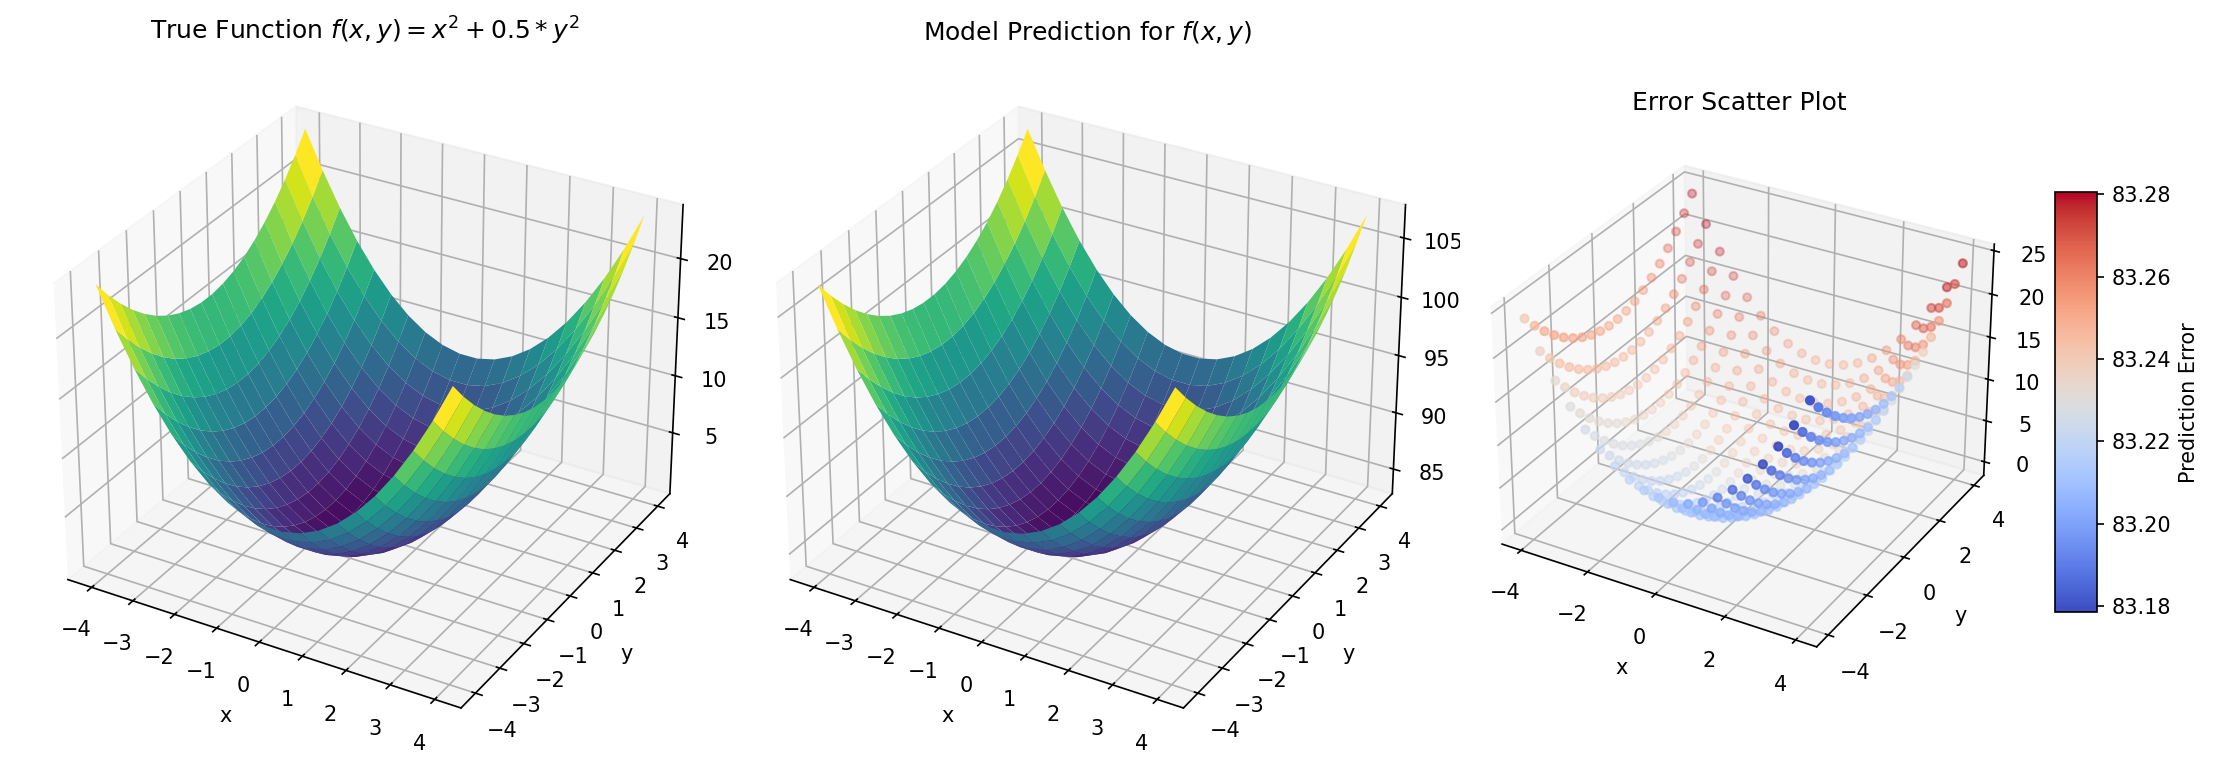

In [5]:
fig = plt.figure(figsize=(15, 5), dpi=150)


ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(x_grid, y_grid, ys.numpy().reshape(x_grid.shape), cmap='viridis')
ax1.set_title('True Function $f(x, y) = x^2 + 0.5*y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('$f(x, y)$')


ax2 = fig.add_subplot(1, 3, 2, projection='3d')
predicted_ys, predicted_grads = model.predict(xs)
predicted_grid = predicted_ys.reshape(x_grid.shape)
ax2.plot_surface(x_grid, y_grid, predicted_grid, cmap='viridis')
ax2.set_title('Model Prediction for $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('$f(x, y)$')


ax3 = fig.add_subplot(1, 3, 3, projection='3d')
predicted_ys = predicted_ys.flatten()
true_ys = ys.numpy().flatten()
errors = predicted_ys - true_ys


scatter = ax3.scatter(xs[:, 0], xs[:, 1], true_ys, c=errors, cmap='coolwarm', s=15)
ax3.set_title('Error Scatter Plot')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('True $f(x, y)$')


cbar = fig.colorbar(scatter, ax=ax3, shrink=0.6, aspect=10)
cbar.set_label('Prediction Error')


plt.tight_layout()
plt.show()

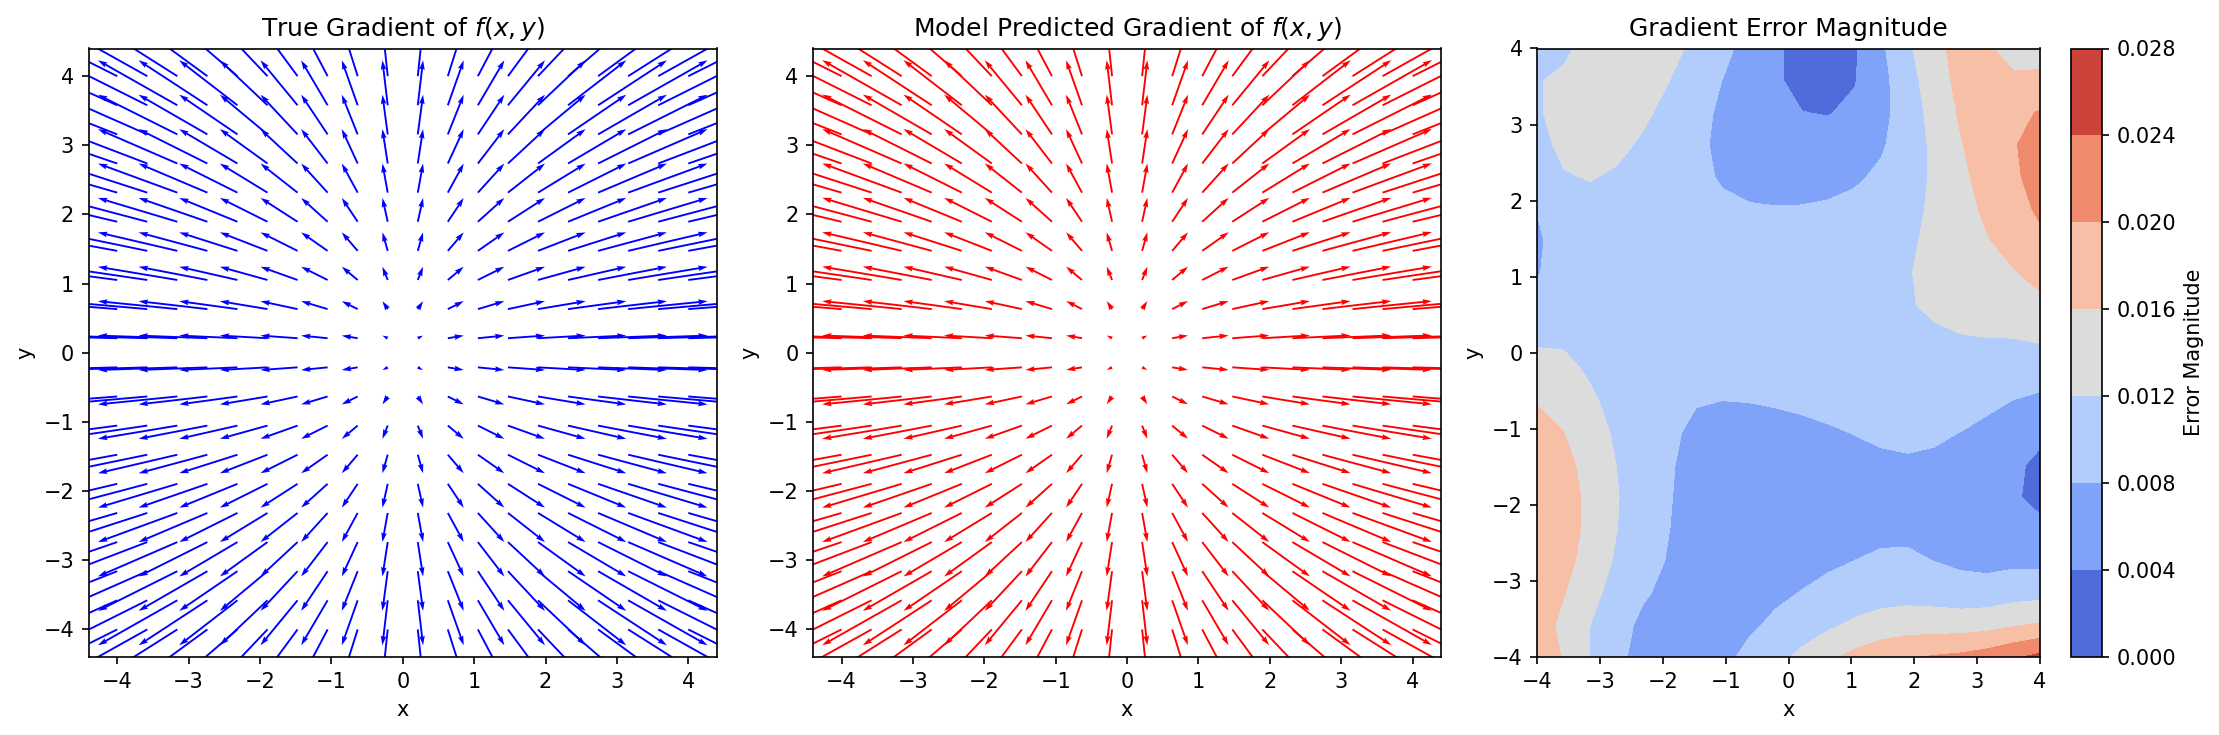

RMSE of Gradient Prediction: 0.011227236855332908


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5), dpi=150)


ax1 = fig.add_subplot(1, 3, 1)
ax1.quiver(x_grid, y_grid, grad_values[:, 0], grad_values[:, 1], color='blue', scale=50)
ax1.set_title('True Gradient of $f(x, y)$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = fig.add_subplot(1, 3, 2)
ax2.quiver(x_grid, y_grid, predicted_grads[:, 0], predicted_grads[:, 1], color='red', scale=50)
ax2.set_title('Model Predicted Gradient of $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')


error_magnitude = np.linalg.norm(grad_values - predicted_grads, axis=1).reshape(x_grid.shape)

ax3 = fig.add_subplot(1, 3, 3) 
c = ax3.contourf(x_grid, y_grid, error_magnitude, cmap='coolwarm')
ax3.set_title('Gradient Error Magnitude')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
fig.colorbar(c, ax=ax3, label='Error Magnitude')

plt.tight_layout()
plt.show()


rmse = np.sqrt(np.mean(error_magnitude**2))
print(f"RMSE of Gradient Prediction: {rmse}")
